<a href="https://colab.research.google.com/github/Aryasita629/Aryasita629.github.io/blob/main/cobaaa_METODE_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [86]:
dataset = pd.read_excel('DATA DIAGNOSA KELUHAN.xlsx')
dataset.head()

,Hasil Diagnosa,P1 (Nyeri pinggang),P2 (Tenggorokan nyeri),P3 (Batuk),P4 (Nyeri pada persendian),P5 (Nyeri Lutut),P6 (Pusing),P7 (Nyeri leher),P8 (Nyeri perut sebelah kanan),P9 (Panas),...,P17 (Iritasi di sekitar anus),P18 (Pembengkakan pembuluh darah yang terletak di anus),P19 (Kontrol piskosa),P20 (Gangguan mental berat),P21 (Mata kanan merah),P22 (Infeksi pada kornea mata),P23 ( Pembengkakan pada kulit),P24 ( Kaki kanan bengkak),P25 (Bising usus meningkat),P26 ( Nyeri lambung )
0,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,myalgia,0,1,1,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,myalgia,0,0,0,1,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Hasil Diagnosa                                           370 non-null    object 
 1   P1 (Nyeri pinggang)                                      370 non-null    int64  
 2   P2 (Tenggorokan nyeri)                                   370 non-null    int64  
 3   P3 (Batuk)                                               370 non-null    int64  
 4   P4 (Nyeri pada persendian)                               370 non-null    int64  
 5   P5 (Nyeri Lutut)                                         370 non-null    int64  
 6   P6 (Pusing)                                              369 non-null    float64
 7   P7 (Nyeri leher)                                         370 non-null    int64  
 8   P8 (Nyeri perut sebelah kanan)

In [88]:
x = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]].values
y = dataset.iloc[:, -1].values

In [89]:
print(x)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [90]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [91]:
# Set training data dan testing data: 80% - 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  296
x_test =  74
y_train =  296
y_test =  74


In [92]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
print(x_test)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [94]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [95]:
print(y_test)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train , x_test)
print(y_train, y_test)

[[-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 ...
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
   9.88264472]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]] [[-0.31031645 -0.29704426 -0.316815   ...  3.36650165  3.36650165
  -0.10118749]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 ...
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 [-0.31031645 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]
 [ 3.22251693 -0.29704426 -0.316815   ... -0.29704426 -0.29704426
  -0.10118749]]
[0 0 0 0 0 0 0 0

In [97]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_test, y_test)


GaussianNB()

In [98]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0]


In [99]:
classifier.predict_proba(x_test)

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.17139438e-085, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.17139438e-085, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.17139438e-085, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [2.17975396e-087, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.0

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  5]
 [ 0  7]]


In [101]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        67
           1       0.58      1.00      0.74         7

    accuracy                           0.93        74
   macro avg       0.79      0.96      0.85        74
weighted avg       0.96      0.93      0.94        74



In [102]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :93 persen


In [103]:
import seaborn as sn
import matplotlib.pyplot as plt

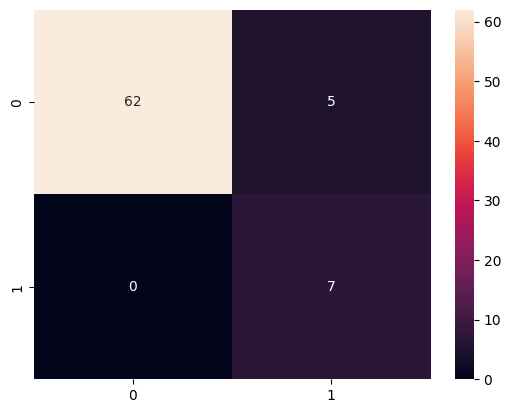

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.show()